# Export onnx with your trained weights

In [ ]:
import os
import glob

def get_best_checkpoint(base_dir):
    best_ckpt = None
    latest_time = 0

    pattern = os.path.join(base_dir, "best_coco_bbox_mAP_*.pth")
    candidates = glob.glob(pattern)

    for ckpt_path in candidates:
        mtime = os.path.getmtime(ckpt_path)
        if mtime > latest_time:
            latest_time = mtime
            best_ckpt = ckpt_path

    return best_ckpt

best_ckpt = get_best_checkpoint("mmdetection/work_dirs/rtmdet_tiny_8xb32-300e_coco_turnliz/")
print(f"Using best checkpoint: {best_ckpt}")

In [ ]:
# revise the code according to your model
# the second line is the location of exporting script, base on your nature of your task (classification/ detection/ segmentation)
# the third line is the location of configs of your model
# the fourth line is the location of weights (pth) of your model
# the fifth line is a sample of image
# the sixth line is exporting location
# the seventh line is choosing model to run on cpu or cuda

In [1]:
%run mmdeploy/tools/deploy.py \
mmdeploy/configs/mmdet/detection/detection_onnxruntime_dynamic.py \
mmdetection/work_dirs/rtmdet_tiny_8xb32-300e_coco_turnliz/rtmdet_tiny_8xb32-300e_coco_turnliz.py \
{best_ckpt} \
mmdetection/data/open-images-v7/val/0dda17bcb0902e25.jpg \
--work-dir mmdeploy_model/rtmdet \
--device cpu

06/27 14:20:00 - mmengine - INFO - Start pipeline mmdeploy.apis.pytorch2onnx.torch2onnx in subprocess
06/27 14:20:01 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "Codebases" registry tree. As a workaround, the current "Codebases" registry in "mmdeploy" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.
06/27 14:20:01 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "mmdet_tasks" registry tree. As a workaround, the current "mmdet_tasks" registry in "mmdeploy" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.
Loads checkpoint by local backend from path: mmdetection/work_dirs/rtmdet_tiny_8xb32-300e_coco_turnliz/epoch_60.pth
06/27 14:20:02 - mmengine - WARNING - DeprecationWar

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdeploy/mmdeploy/core/optimizers/function_marker.py:160: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  ys_shape = tuple(int(s) for s in ys.shape)
/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/layers/se_layer.py:158: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/backbones/csp_darknet.py:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(ena

06/27 14:20:03 - mmengine - INFO - Execute onnx optimize passes.
06/27 14:20:03 - mmengine - INFO - Finish pipeline mmdeploy.apis.pytorch2onnx.torch2onnx
06/27 14:20:04 - mmengine - INFO - Start pipeline mmdeploy.apis.utils.utils.to_backend in main process
06/27 14:20:04 - mmengine - INFO - Finish pipeline mmdeploy.apis.utils.utils.to_backend
06/27 14:20:04 - mmengine - INFO - visualize onnxruntime model start.
06/27 14:20:08 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "Codebases" registry tree. As a workaround, the current "Codebases" registry in "mmdeploy" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.
06/27 14:20:08 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "mmdet_tasks" registry tree. As a workaround, the current "mmdet_tasks" registry in "mmdeploy" is used to build instance. This may c

2025-06-27 14:20:08.272733542 [W:onnxruntime:, transformer_memcpy.cc:83 ApplyImpl] 7 Memcpy nodes are added to the graph main_graph for CUDAExecutionProvider. It might have negative impact on performance (including unable to run CUDA graph). Set session_options.log_severity_level=1 to see the detail logs before this message.
2025-06-27 14:20:08.273777318 [W:onnxruntime:, session_state.cc:1280 VerifyEachNodeIsAssignedToAnEp] Some nodes were not assigned to the preferred execution providers which may or may not have an negative impact on performance. e.g. ORT explicitly assigns shape related ops to CPU to improve perf.
2025-06-27 14:20:08.273782816 [W:onnxruntime:, session_state.cc:1282 VerifyEachNodeIsAssignedToAnEp] Rerunning with verbose output on a non-minimal build will show node assignments.
/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmengine/mmengine/visualization/visualizer.py:760: UserWarning: Warning: The bbox is out of bounds, the drawn bbox may not be 

06/27 14:20:19 - mmengine - INFO - visualize onnxruntime model success.
06/27 14:20:19 - mmengine - INFO - visualize pytorch model start.
06/27 14:20:22 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "Codebases" registry tree. As a workaround, the current "Codebases" registry in "mmdeploy" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.
06/27 14:20:22 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "mmdet_tasks" registry tree. As a workaround, the current "mmdet_tasks" registry in "mmdeploy" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.


/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/layers/se_layer.py:158: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/backbones/csp_darknet.py:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
/home/z890/.conda/envs/mm_rtm/lib/python3.10/site-packages/torch/functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4314.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmengine/mmengine/

Loads checkpoint by local backend from path: mmdetection/work_dirs/rtmdet_tiny_8xb32-300e_coco_turnliz/epoch_60.pth
06/27 14:20:24 - mmengine - INFO - visualize pytorch model success.
06/27 14:20:24 - mmengine - INFO - All process success.


# Inference the onnx

In [2]:
# providers set provider priority cuda or cpu
import onnxruntime
sess = onnxruntime.InferenceSession("mmdeploy_model/rtmdet/end2end.onnx", providers=["CUDAExecutionProvider"])
print(sess.get_providers())

['CUDAExecutionProvider', 'CPUExecutionProvider']


2025-06-27 14:20:25.366125029 [W:onnxruntime:, transformer_memcpy.cc:83 ApplyImpl] 7 Memcpy nodes are added to the graph main_graph for CUDAExecutionProvider. It might have negative impact on performance (including unable to run CUDA graph). Set session_options.log_severity_level=1 to see the detail logs before this message.
2025-06-27 14:20:25.367158800 [W:onnxruntime:, session_state.cc:1280 VerifyEachNodeIsAssignedToAnEp] Some nodes were not assigned to the preferred execution providers which may or may not have an negative impact on performance. e.g. ORT explicitly assigns shape related ops to CPU to improve perf.
2025-06-27 14:20:25.367162565 [W:onnxruntime:, session_state.cc:1282 VerifyEachNodeIsAssignedToAnEp] Rerunning with verbose output on a non-minimal build will show node assignments.


In [3]:
#Detection by official
from mmdeploy.apis import inference_model
model_cfg = 'mmdetection/work_dirs/rtmdet_tiny_8xb32-300e_coco_turnliz/rtmdet_tiny_8xb32-300e_coco_turnliz.py'
deploy_cfg = 'mmdeploy/configs/mmdet/detection/detection_onnxruntime_dynamic.py'
backend_files = 'mmdeploy_model/rtmdet/end2end.onnx'
image = 'mmdetection/data/open-images-v7/val/0dda17bcb0902e25.jpg'
result = inference_model(
    model_cfg = model_cfg,
    deploy_cfg = deploy_cfg,
    backend_files = [backend_files],
    img = image,
    device='cpu'
)
print(result)

06/27 14:20:28 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "Codebases" registry tree. As a workaround, the current "Codebases" registry in "mmdeploy" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.
06/27 14:20:28 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "mmdet_tasks" registry tree. As a workaround, the current "mmdet_tasks" registry in "mmdeploy" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.
06/27 14:20:28 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "backend_detectors" registry tree. As a workaround, the current "backend_detectors" registry in "mmdeploy" is used to build instance. This may cause unexpected failure when running

2025-06-27 14:20:28.418611601 [W:onnxruntime:, transformer_memcpy.cc:83 ApplyImpl] 7 Memcpy nodes are added to the graph main_graph for CUDAExecutionProvider. It might have negative impact on performance (including unable to run CUDA graph). Set session_options.log_severity_level=1 to see the detail logs before this message.
2025-06-27 14:20:28.419598492 [W:onnxruntime:, session_state.cc:1280 VerifyEachNodeIsAssignedToAnEp] Some nodes were not assigned to the preferred execution providers which may or may not have an negative impact on performance. e.g. ORT explicitly assigns shape related ops to CPU to improve perf.
2025-06-27 14:20:28.419602127 [W:onnxruntime:, session_state.cc:1282 VerifyEachNodeIsAssignedToAnEp] Rerunning with verbose output on a non-minimal build will show node assignments.


[<DetDataSample(

    META INFORMATION
    scale_factor: (0.625, 0.625)
    batch_input_shape: (640, 640)
    img_path: 'mmdetection/data/open-images-v7/val/0dda17bcb0902e25.jpg'
    pad_shape: (640, 640)
    img_shape: (640, 640)
    ori_shape: (768, 1024)
    img_id: 0

    DATA FIELDS
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([[ 116.8256,  390.4857,  617.4672,  593.1620],
                        [ 772.9290,  297.7433, 1024.3516,  477.9315],
                        [ 818.8770,   38.7882,  847.1398,   95.3395],
                        ...,
                        [ 985.2913,   74.8553, 1023.7881,  464.4918],
                        [ 964.0355,  295.8158, 1023.7781,  534.6049],
                        [ 120.0880,   86.5003,  326.0048,  617.4462]])
            labels: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
                        1, 1, 0, 1, 0, 0, 1, 1, 1, 

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmengine/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


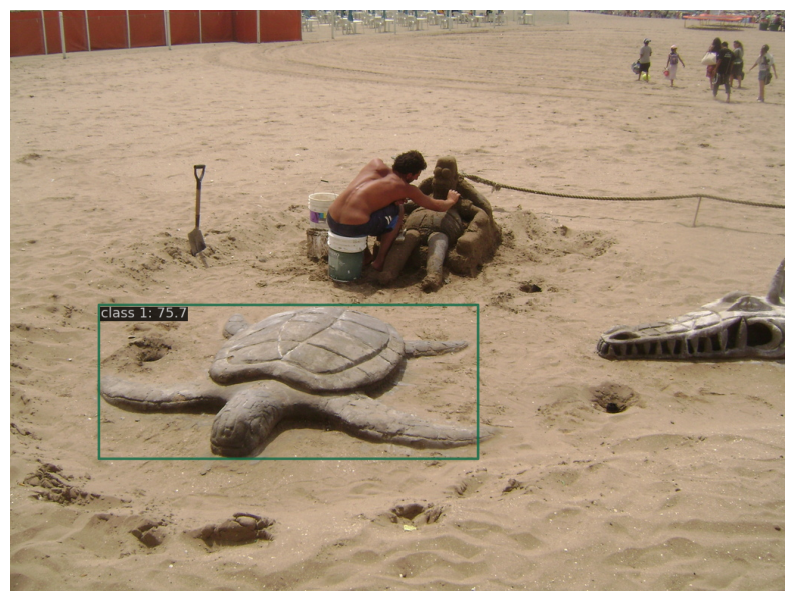

In [4]:
# plot the detection
import mmcv
from mmdet.registry import VISUALIZERS
import cv2
import numpy as np
from mmdeploy.utils import get_input_shape, load_config
import matplotlib.pyplot as plt

# read image
img = mmcv.imread(image)
img = mmcv.imconvert(img, 'bgr', 'rgb')

# initialize visualizer
deploy_cfg, model_cfg = load_config(deploy_cfg, model_cfg)
visualizer = VISUALIZERS.build(model_cfg.visualizer)

# Create a new DetDataSample instead of modifying the existing one
threshold = 0.5  # Set an appropriate threshold for your case

# Filter based on confidence threshold
count = sum(result[0].pred_instances.scores > threshold)  # Get the number of detections above threshold

# Slice the scores, bboxes, and labels
sliced_scores = result[0].pred_instances.scores[:count]
sliced_bboxes = result[0].pred_instances.bboxes[:count]
sliced_labels = result[0].pred_instances.labels[:count]

# Create a new InstanceData object with the sliced fields
from mmengine.structures import InstanceData
new_pred_instances = InstanceData(
    scores=sliced_scores,
    bboxes=sliced_bboxes,
    labels=sliced_labels
)

# Update the result with the new pred_instances
result[0].pred_instances = new_pred_instances

# Now use this filtered_result for visualization
visualizer.add_datasample(
    'result',
    img,
    data_sample=result[0],
    draw_gt=False,
    wait_time=0
)
# draw
drawn_img = visualizer.get_image()

# plot with plt
plt.figure(figsize=(10, 8))
plt.imshow(drawn_img)
plt.axis('off')
plt.show()

Available providers: ['CPUExecutionProvider']
Model output: [array([[[7.3008881e+01, 2.4404645e+02, 3.8597058e+02, 3.7073264e+02,
         7.5793415e-01],
        [4.8309457e+02, 1.8611429e+02, 6.4021674e+02, 2.9868921e+02,
         3.4284759e-01],
        [5.1180554e+02, 2.4245333e+01, 5.2946075e+02, 5.9588982e+01,
         2.7638501e-01],
        ...,
        [5.5227728e+02, 1.4102049e+00, 6.1026862e+02, 1.8391689e+01,
         2.5287986e-02],
        [2.7788361e+02, 3.7319763e+02, 6.1605090e+02, 5.3989532e+02,
         2.5260240e-02],
        [6.0030017e+02, 6.4390335e+01, 6.3972412e+02, 2.5861398e+02,
         2.5211245e-02]]], dtype=float32), array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
        1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
        1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1

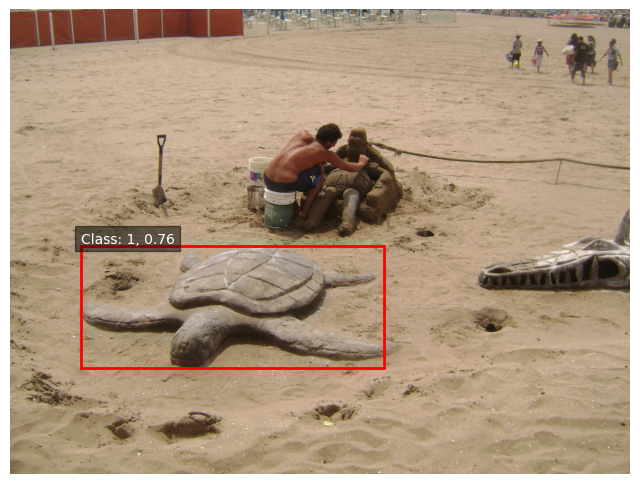

In [5]:
#Detection without torch (may have little difference with official)
import cv2
import numpy as np
import onnxruntime
import matplotlib.pyplot as plt
def preprocess_image(image):

    ori_shape = image.shape[:2]  # (H, W)

    '''
    according to config
        pipeline=[
            dict(backend_args=None, type='LoadImageFromFile'),
            dict(keep_ratio=True, scale=(
                640,
                640,
            ), type='Resize'),
            dict(
                pad_val=dict(img=(
                    114,
                    114,
                    114,
                )),
                size=(
                    640,
                    640,
                ),
                type='Pad'),
    '''
    # Resize while keeping aspect ratio
    h, w = ori_shape
    input_size=(640, 640)
    scale = min(input_size[0] / h, input_size[1] / w)
    new_h, new_w = int(h * scale), int(w * scale)
    resized = cv2.resize(image, (new_w, new_h))

    # Pad to target size with 114
    pad_image = np.full((input_size[1], input_size[0], 3), 114.0, dtype=np.float32)
    pad_image[:new_h, :new_w, :] = resized

    '''
    according to config
        data_preprocessor=dict(
            batch_augments=None,
            bgr_to_rgb=False,
            mean=[
                103.53,
                116.28,
                123.675,
            ],
            std=[
                57.375,
                57.12,
                58.395,
            ],
    '''
    # Convert to float32 and normalize
    mean = np.array([103.53, 116.28, 123.675])
    std = np.array([57.375, 57.12, 58.395])
    normalized_image = (pad_image - mean) / std

    # Transpose to CHW layout
    normalized_image = normalized_image.transpose(2, 0, 1)

    meta = {
        'img_shape': (new_h, new_w),
        'pad_shape': (input_size[1], input_size[0]),
        'scale_factor': scale,
        'ori_shape': ori_shape
    }

    return normalized_image, meta

sess = onnxruntime.InferenceSession("mmdeploy_model/rtmdet/end2end.onnx", providers=["CPUExecutionProvider"])
print("Available providers:", sess.get_providers())

# Load and preprocess the image
image = cv2.imread("mmdetection/data/open-images-v7/val/0dda17bcb0902e25.jpg")

result, meta = preprocess_image(image)

# Get the model's input name (usually 'input' or something similar)
input_name = sess.get_inputs()[0].name

# Run inference on the input image
outputs = sess.run(None, {input_name: [result]})

# Print the output
print("Model output:", outputs)

threshold = 0.5
# Extract boxes and class IDs
boxes, class_ids = outputs[0], outputs[1]

# Convert to numpy
boxes = np.squeeze(boxes)  # Shape: (201, 5) -> (201, 5)
class_ids = np.squeeze(class_ids)  # Shape: (201,)

# Filter boxes with confidence threshold
filtered_boxes = []
filtered_classes = []
filtered_confs = []

for i in range(len(boxes)):
    x1, y1, x2, y2, conf = boxes[i]
    if conf > threshold:
        filtered_boxes.append((x1, y1, x2, y2))
        filtered_classes.append(int(class_ids[i]))
        filtered_confs.append(conf)

# Plot image with bounding boxes
fig, ax = plt.subplots(1, figsize=(8, 8))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
ax.imshow(image)

w_ratio = meta['ori_shape'][1]/meta['img_shape'][1]
h_ratio = meta['ori_shape'][0]/meta['img_shape'][0]
for i, (x1, y1, x2, y2) in enumerate(filtered_boxes):
    x1 = x1*w_ratio 
    x2 = x2*w_ratio
    y1 = y1*h_ratio
    y2 = y2*h_ratio
    conf = filtered_confs[i]
    
    # Draw rectangle
    rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, color="red", linewidth=2)
    ax.add_patch(rect)
    
    # Add confidence text
    label = f"Class: {filtered_classes[i]}, {conf:.2f}"
    ax.text(x1, y1 - 5, label, color="white", fontsize=10, bbox=dict(facecolor="black", alpha=0.5))

plt.axis("off")
plt.show()